In [1]:
%pylab inline
from scipy.optimize import curve_fit

Populating the interactive namespace from numpy and matplotlib


In [2]:
def L(x,mii,bii):
    return mii*x+bii

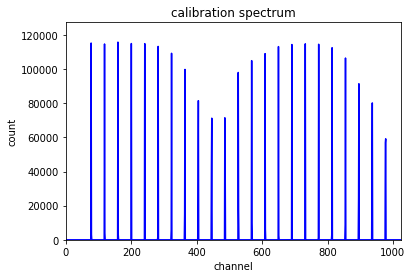

In [3]:
arr=genfromtxt("cal44.txt")
arr=array(arr)
x=linspace(0,len(arr)-1,len(arr))
y=arr
plot(x,y,'b-')
xlabel('channel')
xlim(0,1024)
ylim(0,max(arr)*1.1)
ylabel('count')
title('calibration spectrum')
show()

In [4]:
n=0
m=0
channel=[]
count=[]
num=[]
M=[]
sd=[]
for i in range (len(arr)):
    if arr[i]==0:
        pass
    else:
        channel.append(i)
    
ch=array(channel)
for j in range (len(ch)):
    if j==0:
        count.append(arr[channel[j]])
    elif j==len(ch)-1 :
        num.append(j+1)
        count.append(arr[channel[j]])
    else:
        if channel[j]>channel[j-1]+5:
            num.append(j)
            count.append(arr[channel[j]])
        else:
            count.append(arr[channel[j]])
    
co=array(count)
num=array(num)
for k in range(len(num)):
    if k==0:
        n=num[k]
        M.append(dot(co[0:n],ch[0:n])/sum(co[0:n]))
    else:
        m=num[k-1]
        n=num[k]
        M.append(dot(co[m:n],ch[m:n])/(sum(co[m:n])))
M=around(array(M),2)
print ('the mean values are: ',M)

for k in range(len(M)):
    if k==0:
        n=num[k]
        sd.append(((dot(co[0:n],(ch[0:n]-M[k])**2))/(sum(co[0:n])-1))**0.5)
    else:
        m=num[k-1]
        n=num[k]
        sd.append(((dot(co[m:n],(ch[m:n]-M[k])**2))/(sum(co[m:n])-1))**0.5)
sd=array(sd)
sd=(around(sd,2))
print ('the uncertainties are:',sd)

the mean values are:  [ 77.03 118.03 159.03 200.   241.   281.98 322.95 363.87 404.71 445.62
 486.38 527.15 568.09 609.05 650.02 691.01 732.   772.99 813.97 854.92
 895.79 936.7  977.51]
the uncertainties are: [0.16 0.18 0.16 0.06 0.06 0.13 0.22 0.34 0.46 0.49 0.49 0.36 0.28 0.22
 0.14 0.08 0.06 0.09 0.16 0.27 0.41 0.46 0.5 ]


[0.64       0.97454545 1.30909091 1.64363636 1.97818182 2.31272727
 2.64727273 2.98181818 3.31636364 3.65090909 3.98545455 4.32
 4.65454545 4.98909091 5.32363636 5.65818182 5.99272727 6.32727273
 6.66181818 6.99636364 7.33090909 7.66545455 8.        ]
0.0082


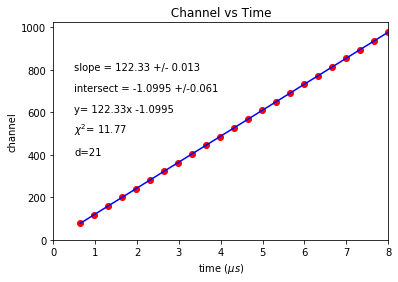

In [5]:
st=0.64
NT=8.0
y=M
x=linspace(st,NT,len(num))
print (x)
plot(x,y,'ro')
xlabel('time ($\mu s$)')
ylabel('channel')
title(' Channel vs Time ')
para, unc = curve_fit(L,x,y,p0=[134.77, 0.01],maxfev=100000000)           
Z=array(L(x,*para))
plot(x,Z, 'b-')
chi=round(sum((Z-y)**2/(sd)**2),2)
m=round(para[0],2)
um=round(sqrt(diag(unc)[0]),3)
ins=round(para[1],4)
ub=round(sqrt(diag(unc)[1]),3)
text(0.5,800, 'slope = %s +/- %s' % (m,um))
text(0.5,700, 'intersect = %s +/-%s' % (ins, ub))
text(0.5,600,'y= %sx %s' % (m,ins))
text(0.5,500,r'$\chi^2$= %s' %chi)
text(0.5,400,'d=%s'%(len(x)-2))
xlim(0,8)
ylim(0,1024)
print (round(1/m,4))

In [6]:
arr=genfromtxt("muon.txt")
arr=array(arr)
def E(x,a,b,c):
    return a*exp(-(x/b))+c
def C(y,z):
    return (y-z)**2/y

def Ch(x):
    return m*x+ins
def T(x):
    return (x-ins)/m
def S(x,Ta,xs):
    return Ta*sqrt((xs**2+ub**2)/(x-ins)**2+(um/m)**2)
def St(x,Ta,xs):
    return Ta*sqrt((xs**2)/(x-ins)**2)

3098.0
229
[   0    1    2    3    4    5    6    7    8    9   10   12   13   15
   16   17   18   20   21   22   23   24   25   26   27   28   34   35
   36   40   41   42   43   44   45   46   47   48   49   50   51   52
   53   54   55   56   58   59   60   62   63   64   65   66   67   68
   69   70   71   72   73   74   75   76   77   78   79   80   81   82
   83   84   85   86   87   88   89   90   91   92   93   94   95   97
   98   99  100  101  102  103  104  105  106  107  108  109  110  111
  112  113  114  115  116  117  118  119  120  121  122  123  124  125
  126  127  128  129  130  131  132  133  134  135  136  137  138  139
  140  141  142  143  144  145  146  147  148  149  150  151  152  153
  154  155  156  157  158  159  160  161  162  163  164  165  166  167
  169  170  171  172  173  174  175  176  177  178  375  513  551  560
  575  578  586  588  604  612  622  625  631  636  639  648  649  660
  664  683  690  692  695  709  713  715  716  718  725  726  727 

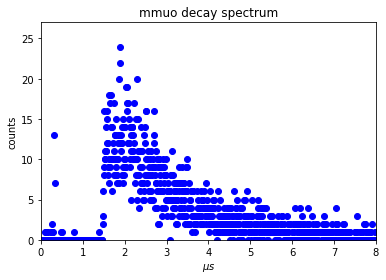

In [7]:
x=linspace(0,len(arr)-1,len(arr))
x_1=1/m*(x-ins)
y=arr
print (sum(arr[178:]))
plot(x_1,y,'bo')
xlabel(r'$\mu s$')
ylabel('counts')
title('mmuo decay spectrum')
xlim(0,8)
ylim(0,27)
pm=where(y==max(y[100:]))[0][0]
print(pm)
print(where(y==0)[0])
show()


In [8]:
mm=978
nn=178
bs=80
ii=linspace(nn+(mm-nn)/(1.0*bs),mm,bs)
print ((mm-nn)/(1.0*bs))
print (ii)
y_y3=[]
x_x3=[]
for j in range(len(ii)):
    xx=[]
    yy=[]
    if j==0:
        for i in range(len(x)):
            if nn<x[i]<=ii[0]:
                yy.append(y[i])
                xx.append(x[i])
            else:
                pass
    else:
         for i in range(len(x)):
                if ii[j-1]<x[i]<=ii[j]:
                    yy.append(y[i])
                    xx.append(x[i])
                else:
                    pass
    if sum(yy)==0:
        pass
    else:
        x_x3.append(dot(yy,xx)/sum(yy))
        y_y3.append(sum(yy))
        
y_y3=array(y_y3)
x_x3=array(x_x3)

10.0
[188. 198. 208. 218. 228. 238. 248. 258. 268. 278. 288. 298. 308. 318.
 328. 338. 348. 358. 368. 378. 388. 398. 408. 418. 428. 438. 448. 458.
 468. 478. 488. 498. 508. 518. 528. 538. 548. 558. 568. 578. 588. 598.
 608. 618. 628. 638. 648. 658. 668. 678. 688. 698. 708. 718. 728. 738.
 748. 758. 768. 778. 788. 798. 808. 818. 828. 838. 848. 858. 868. 878.
 888. 898. 908. 918. 928. 938. 948. 958. 968. 978.]


a is: 293.04 +/- 20.61
c is: -6.26 +/- 4.11
b is:257.04 +/-24.12
chi-square is: 159.59
df is: 77


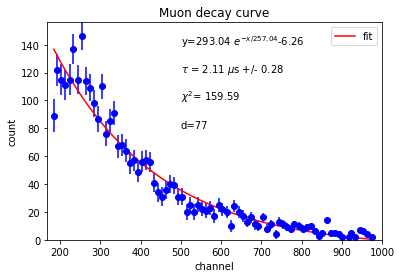

In [9]:
x_3=array(x_x3[:])
y_3=array(y_y3[:])
para, unc = curve_fit(E,x_3,y_3,p0=[215.1,259,25],maxfev=100000000)  
a=round(para[0],2)
b=round(para[1],2)
c=round(para[2],2)
Z=array(E(x_3,*para))
yerr=array(sqrt(Z))
errorbar(x_3,y_3,yerr,fmt='o',color='b')
plot (x_3,Z,'r-',label='fit')
ua=round(sqrt(diag(unc)[0]),2)
ub=round(sqrt(diag(unc)[1]),2)
uc=round(sqrt(diag(unc)[2]),2)
chigs=around(C(y_3,Z),2)
print ('a is: %s +/- %s'%(a,ua))
print ('c is: %s +/- %s'%(c,uc))
print('b is:%s +/-%s'%(b,ub))
print ('chi-square is:',sum(chigs))
print ('df is:',len(y_3)-3)
text(500,140, r'y=%s $e^{-x/%s}$-%s' %(a,b,abs(c)))
text(500,120, r'$\tau$ = 2.11 $\mu$s +/- 0.28')
text(500,100,r'$\chi^2$= %s' %sum(chigs))
text(500,80,'d=%s'%(len(x_3)-3))
title('Muon decay curve')
xlabel('channel')
xlim(nn-10,1000)
ylim(0,max(y_3+10))
ylabel('count')
legend(loc='best')
show()


In [10]:
Tau=(round((T(b)),2))
Sta=round(St(b,Tau,ub),2)
Sys=round(S(b,Tau,0),2)
SMu=round(S(b,Tau,ub),2)
print ('the mean lifetime of muon is: %s us +/- %s'%(Tau,SMu))
print ('the mean lifetime of muon is: %s us +/- %s(stat) +/- %s (syst)'%(Tau,Sta,Sys))

the mean lifetime of muon is: 2.11 us +/- 0.28
the mean lifetime of muon is: 2.11 us +/- 0.2(stat) +/- 0.2 (syst)
